# 作业:

以地-月系为例(质量参数 $\mu = 0.0125$, 地月平均距离取 384400 $\mathrm{km}$), 请编写程序:

1. 计算三个共线平动点的位置;
2. 计算共线平动点 $L_1$ 和 $L_2$ 附近的平面 Lyapunov 轨道族, 分析 Jacobi 常数和周期随振幅参数的变化;
3. 计算 $L_1$ 点附近振幅为 $5000\mathrm{km}$ 的平面 Lyapunov 轨道的不变流形;
4. 计算第 3 问中平面 Lyapunov 轨道不稳定流形的第1次、第2次、第3次近月点庞加莱截面(即 $\dot{r}_m=0$的截面).

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from scipy.optimize import newton
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mu = 0.0125
dis = 384400 * u.km


圆型限制性三体问题运动方程为
$$ \left\{
\begin{aligned}
&\ddot{x} - 2 \dot{y} = \frac{\partial \Omega}{\partial x} \\
&\ddot{y} + 2 \dot{x} = \frac{\partial \Omega}{\partial y} \\
&\ddot{z} = \frac{\partial \Omega}{\partial z}
\end{aligned}
\right. $$
其中
$$\Omega = \frac{1}{2}(x^2 + y^2) + \frac{1-\mu}{r_1} + \frac{\mu}{r_2} + \frac{\mu(1-\mu)}{2}$$
由于平动点处的速度和加速度为 $0$, 从而可得平动点满足的方程为:
$$ \left\{
\begin{aligned}
& x-\frac{(1-\mu)(x+\mu)}{r_1^3} - \frac{\mu(x-1+\mu)}{r_2^3} = 0 \\
& y\left( 1-\frac{1-\mu}{r_1^3} - \frac{\mu}{r_2^3} \right) =0\\
& z\left(  -\frac{1-\mu}{r_1^3} - \frac{\mu}{r_2^3} \right)=0
\end{aligned}
\right. $$
其中 $r_1=|x+\mu|$, $r_2 = |x-1+\mu|$

第三个方程中, 括号里面部分不可能为 $0$, 从而 $z=0$, 即平动点位于 $x-y$ 平面内. 第二个方程存在两种情况, 首先当 $y\neq 0$, 此时平动点满足
$$ \left\{
\begin{aligned}
&x-\frac{(1-\mu)(x+\mu)}{r_1^3} - \frac{\mu(x-1+\mu)}{r_2^3} = 0 \\
&1-\frac{1-\mu}{r_1^3} - \frac{\mu}{r_2^3}=0
\end{aligned}
\right. $$
将第二式带入第一式可得 $r_1=1$, $r_2=1$. 即存在两个平动点, 位置为
$$(0.5-\mu, \sqrt{3}/2) \qquad (0.5-\mu, -\sqrt{3}/2),$$
对应于三角平动点 $L_4$, $L_5$


In [60]:
x = 0.5 - mu 
y = 0.5 * np.sqrt(3)

L4 = np.array([x, y])
L5 = np.array([x, -y])

print('L4 平动点的坐标为:', L4)
print('L5 平动点的坐标为:', L5)


L4 平动点的坐标为: [0.4875    0.8660254]
L5 平动点的坐标为: [ 0.4875    -0.8660254]


对于 $y=0$ 的情况, 此时平动点的 x 坐标满足方程
$$f(x) = x-\frac{(1-\mu)(x+\mu)}{|x+\mu|^3} - \frac{\mu(x-1+\mu)}{|x-1+\mu|^3} = 0$$
可以使用 Newton 迭代法计算出共线平动点的具体位置 
$$x_{n+1} = x_n -\frac{f(x_n)}{f'(x_n)}$$

对于 $L_1$ 点, $x+\mu >0$, $x-1+\mu<0$ 从而方程转变为
$$f(x) = x-\frac{1-\mu}{(x+\mu)^2} + \frac{\mu}{(x-1+\mu)^2} $$
进而可以计算出
$$f'(x) = 1+\frac{2(1-\mu)}{(x+\mu)^3} - \frac{2\mu}{(x-1+\mu)^3}$$

In [61]:

def compute_L1_point(mu, guess=0.99):
    """计算L1平动点位置"""
    def f(x):
        r1 = x + mu
        r2 = x + mu - 1
        return x - (1 - mu)/r1**2 + mu/r2**2
    
    def df(x):
        r1 = x + mu
        r2 = x + mu - 1
        return 1 + 2*(1-mu)/r1**3 - 2*mu/r2**3
    
    return newton(f, guess, fprime=df)

x_L1 = compute_L1_point(mu)

print('L1 平动点在 x 轴上的坐标为:', x_L1)

L1 平动点在 x 轴上的坐标为: 0.8352093934071672


对于 $L_2$ 点, $x+\mu >0$, $x-1+\mu>0$ 从而方程转变为
$$f(x) = x-\frac{1-\mu}{(x+\mu)^2} -\frac{\mu}{(x-1+\mu)^2} $$
进而可以计算出
$$f'(x) = 1+\frac{2(1-\mu)}{(x+\mu)^3} + \frac{2\mu}{(x-1+\mu)^3}$$

In [62]:
def compute_L2_point(mu, guess=1.01):
    """计算L1平动点位置"""
    def f(x):
        r1 = x + mu
        r2 = x + mu - 1
        return x - (1 - mu)/r1**2 - mu/r2**2
    
    def df(x):
        r1 = x + mu
        r2 = x + mu - 1
        return 1 + 2*(1-mu)/r1**3 + 2*mu/r2**3
    
    return newton(f, guess, fprime=df)

x_L2 = compute_L2_point(mu)

print('L2 平动点在 x 轴上的坐标为:', x_L2)

L2 平动点在 x 轴上的坐标为: 1.15701093713714


对于 $L_3$ 点, $x+\mu <0$, $x-1+\mu<0$ 从而方程转变为
$$f(x) = x+\frac{1-\mu}{(x+\mu)^2} +\frac{\mu}{(x-1+\mu)^2} $$
进而可以计算出
$$f'(x) = 1-\frac{2(1-\mu)}{(x+\mu)^3} - \frac{2\mu}{(x-1+\mu)^3}$$

In [63]:
def compute_L3_point(mu, guess=-1.0):
    """计算L1平动点位置"""
    def f(x):
        r1 = x + mu
        r2 = x + mu - 1
        return x + (1 - mu)/r1**2 + mu/r2**2
    
    def df(x):
        r1 = x + mu
        r2 = x + mu - 1
        return 1 - 2*(1-mu)/r1**3 - 2*mu/r2**3
    
    return newton(f, guess, fprime=df)

x_L3 = compute_L3_point(mu)

print('L3 平动点在 x 轴上的坐标为:', x_L3)

L3 平动点在 x 轴上的坐标为: -1.0052082264003765


In [64]:
num = 1000

def X0_linear(alpha=0.06, L=x_L1):
    beta = 0.0

    phi_1 = 0.0
    phi_2 = 0.0

    r1 = np.abs(L + mu)
    r2 = np.abs(L + mu - 1)

    c2 = (1-mu)/r1**3 + mu/r2**3
    omega0 = np.sqrt(0.5*(-c2 + 2 + np.sqrt(9*c2**2 - 8*c2)))
    nu0 = np.sqrt(c2)
    kappa = -0.5*(omega0 + (1+2*c2)/omega0)

    def linear_sol(t):
        xi = alpha * np.cos(omega0 * t + phi_1)
        eta = kappa * alpha * np.sin(omega0 * t + phi_1)
        zeta = beta * np.cos(nu0 * t + phi_2)
        
        return np.array([xi, eta, zeta])

    def dif_linear_sol(t):
        d_xi = - alpha * omega0 * np.sin(omega0 * t + phi_1)
        d_eta = kappa * alpha * omega0 * np.cos(omega0 * t + phi_1)
        d_zeta = - beta * nu0 * np.sin(nu0 * t + phi_2)

        return np.array([d_xi, d_eta, d_zeta])


    L1 = np.array([L, 0.0, 0.0])

    X0 = np.concatenate((L1+linear_sol(0), dif_linear_sol(0) ))

    T = 2*np.pi/omega0

    return X0, T


In [65]:
# 动力学系统
class CRTBPSystem:
    """封装CRTBP系统动力学"""
    def __init__(self, mu):
        self.mu = mu
    
    def dynamics(self, t, x):
        """CRTBP动力学方程"""
        r_1 = np.sqrt((x[0]+mu)**2 + x[1]**2 + x[2]**2)
        r_2 = np.sqrt((x[0]+mu-1)**2 + x[1]**2 + x[2]**2)

        y = np.zeros(6) #初始化
        y[:3] = x[3:]
        y[3] = x[0] + 2*x[4] - (1-mu)*(x[0]+mu)/r_1**3 - mu*(x[0]+mu-1)/r_2**3
        y[4] = x[1] - 2*x[3] - (1-mu)*x[1]/r_1**3 - mu*x[1]/r_2**3
        y[5] = - (1-mu)*x[2]/r_1**3 - mu*x[2]/r_2**3

        return y
    
    def jacobian(self, x):
        """计算位置雅可比矩阵"""
        r_1 = np.sqrt((x[0]+mu)**2 + x[1]**2 + x[2]**2)
        r_2 = np.sqrt((x[0]+mu-1)**2 + x[1]**2 + x[2]**2)

        U_xx = 1 - (1-mu)/r_1**3 - mu/r_2**3 + 3*(1-mu)*(x[0]+mu)**2/r_1**5 + 3*mu*(x[0]+mu-1)**2/r_2**5
        U_yy = 1 - (1-mu)/r_1**3 - mu/r_2**3 + 3*(1-mu)*x[1]**2/r_1**5 + 3*mu*x[1]**2/r_2**5
        U_zz = -(1-mu)/r_1**3 - mu/r_2**3 + 3*(1-mu)*x[2]**2/r_1**5 + 3*mu*x[2]**2/r_2**5
        U_xy = 3*(1-mu)*(x[0]+mu)*x[1]/r_1**5 + 3*mu*(x[0]+mu-1)*x[1]/r_2**5
        U_xz = 3*(1-mu)*(x[0]+mu)*x[2]/r_1**5 + 3*mu*(x[0]+mu-1)*x[2]/r_2**5
        U_yz = 3*(1-mu)*x[1]*x[2]/r_1**5 + 3*mu*x[1]*x[2]/r_2**5

        return np.array([
            [U_xx, U_xy, U_xz],
            [U_xy, U_yy, U_yz],
            [U_xz, U_yz, U_zz]
        ])

In [66]:
# 轨道积分器
class OrbitIntegrator:
    """轨道数值积分"""
    def __init__(self, crtbp_system):
        self.system = crtbp_system
    
    def integrate(self, X0, T):
        """积分轨道"""
        t_eval = np.linspace(0, T, num)
        sol = solve_ivp(self.system.dynamics, [0, T], X0, 
                       t_eval=t_eval, rtol=1e-12, atol=1e-12, 
                       method='DOP853')
        return sol.y.T

In [67]:
# 状态转移矩阵计算
class StateTransitionMatrix:
    """状态转移矩阵计算器"""
    def __init__(self, crtbp_system):
        self.system = crtbp_system
    
    def compute(self, X0, T):
        """计算状态转移矩阵"""
        def extended_dynamics(t, y):
            # 解包状态和STM
            state = y[:6]
            Phi = y[6:].reshape(6,6)
            
            # 计算雅可比矩阵
            A = np.zeros((6,6))
            A[:3,3:] = np.eye(3)
            A[3:,:3] = self.system.jacobian(state)
            A[3,4] = 2
            A[4,3] = -2
            
            # 状态导数
            state_dot = self.system.dynamics(t, state)
            # STM导数
            Phi_dot = A @ Phi
            
            return np.concatenate([state_dot, Phi_dot.flatten()])
        
        # 初始条件
        y0 = np.concatenate([X0, np.eye(6).flatten()])
        
        # 积分
        t_eval = np.linspace(0, T, num)
        sol = solve_ivp(extended_dynamics, [0, T], y0, 
                        t_eval=t_eval, rtol=1e-12, atol=1e-12, 
                        method='DOP853')
        
        # 提取结果
        X_T = sol.y[:6,-1]
        Phi = sol.y[6:,-1].reshape(6,6)
        
        return X_T, Phi

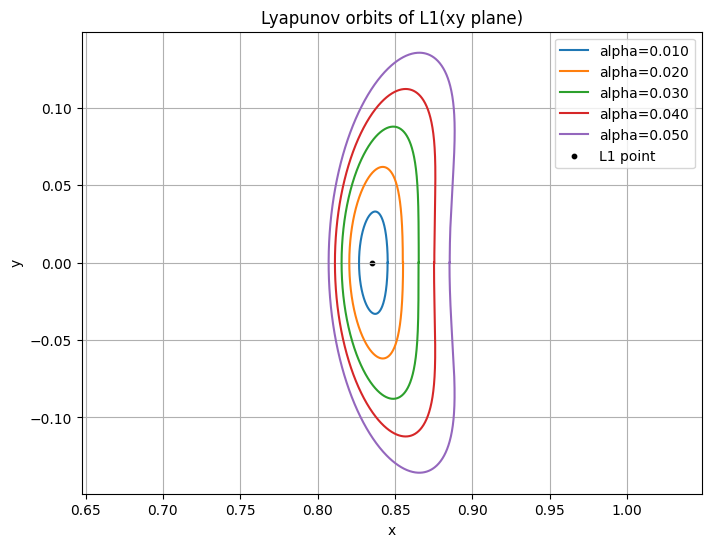

In [68]:

# 微分修正算法
class DifferentialCorrector:
    """周期轨道微分修正"""
    def __init__(self, crtbp_system):
        self.system = crtbp_system
        self.stm_computer = StateTransitionMatrix(crtbp_system)
    
    def correct(self, X0_guess, T_guess, max_iter=20, tol=1e-6):
        """执行微分修正"""
        X0 = X0_guess.copy()
        T = T_guess
        
        for i in range(max_iter):
            # 积分状态和STM
            X_T, Phi = self.stm_computer.compute(X0, T/2)

            G = np.array([X_T[1], X_T[3]])

            # 构建修正方程
            F = self.system.dynamics(0, X0)

            M = np.array([[Phi[1,4], F[1]],
                          [Phi[3,4], F[3]]])
  
            dX0_vecy = np.dot(np.linalg.inv(M), -G)[0]
            dT = np.dot(np.linalg.inv(M), -G)[1]

            # 应用修正
            dX0 = np.zeros(6)

            dX0[4] = dX0_vecy  
            X0 += dX0

            T -= dT
            
            # 检查收敛
            if  np.abs(dX0_vecy) < tol:
                #print(f"在第{i+1}次迭代收敛")
                break
            elif i == max_iter:
                print("没有收敛")
            
        return X0, T


crtbp = CRTBPSystem(mu)
integrator = OrbitIntegrator(crtbp)
STM = StateTransitionMatrix(crtbp)
corrector = DifferentialCorrector(crtbp)


plt.figure(figsize=(8, 6))

for i in range(5):
    alpha = 0.01*(1+i)
    X0_guess, T = X0_linear(alpha)

    # 微分修正
    X0_corrected, T_corrected = corrector.correct(X0_guess, T, tol=1e-6)

    # 积分并绘制轨道
    traj_corrected = integrator.integrate(X0_corrected, T_corrected)


    plt.plot(traj_corrected[:,0], traj_corrected[:,1], label=f'alpha={alpha:.3f}')  # xy平面 x:0, y:1, z:2
    
plt.scatter(x_L1, 0, c='black', label='L1 point', s=10)
plt.title('Lyapunov orbits of L1(xy plane)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.show()


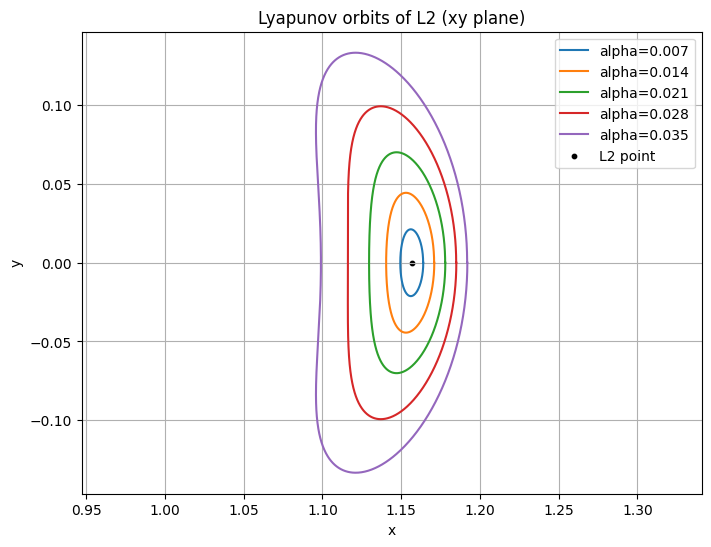

In [69]:
plt.figure(figsize=(8, 6))

for i in range(5):
    alpha = 0.007*(1+i)
    X0_guess, T = X0_linear(alpha, L=x_L2)

    # 微分修正
    X0_corrected, T_corrected = corrector.correct(X0_guess, T, tol=1e-6)

    # 积分并绘制轨道
    traj_corrected = integrator.integrate(X0_corrected, T_corrected)


    plt.plot(traj_corrected[:,0], traj_corrected[:,1], label=f'alpha={alpha:.3f}')  # xy平面 x:0, y:1, z:2
    
plt.scatter(x_L2, 0, c='black', label='L2 point', s=10)
plt.title('Lyapunov orbits of L2 (xy plane)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.show()